# Importing packages

In [1]:
from workers import MasterNode
from models import LinReg, LogReg, LogRegNoncvx, NN_1d_regression
from utils import read_run, get_alg, create_plot_dir, PLOT_PATH
from sklearn.datasets import dump_svmlight_file

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from prep_data import number_of_features
import math
import torch

from numpy.random import default_rng
from numpy import linalg as la
from prep_data import DATASET_PATH
import copy

# Customizing Matplotlib

In [2]:
plt.style.use('fast')
mpl.rcParams['mathtext.fontset'] = 'cm'
# mpl.rcParams['mathtext.fontset'] = 'dejavusans'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['axes.titlesize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['axes.labelsize'] = 'xx-large'

In [3]:
markers = ['x', '.', '+', '1', 'p','*', 'D' , '.',  's']

# Experiments

## 1. DIANA

In [4]:
regularization=0.1

In [5]:
alphas = np.linspace(0.1, 1.0, 10)
dataset_name = 'mushrooms'
n_workers = 8
exp = 'dianadiana'
max_it = 1000

alg = LogReg
logreg = True

d = number_of_features(dataset_name)
ks = np.random.randint(d, size=n_workers)
ks += 1

In [5]:
ks

array([ 49,  97,  70,  36,  83,  65, 107,  14])

In [6]:
for alpha in alphas:
    alpha = float(alpha)
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it, regularization=regularization)
    model.run_diana_sparsification(ks, max_it)

alpha = 0.1 
 --------------------
Worker(logreg) 0 tolerance 1e-06
Learning rate is 0.2756833586246208
  238/100000 Iterations: fun_value 0.073031 norm of the gradient 9.726738730469635e-076
Worker(logreg) 1 tolerance 1e-06
Learning rate is 0.287598316258724
  228/100000 Iterations: fun_value 0.074744 norm of the gradient 9.85185008140024e-0706
Worker(logreg) 2 tolerance 1e-06
Learning rate is 0.2487353717181219
  285/100000 Iterations: fun_value 0.069724 norm of the gradient 9.703670206720303e-076
Worker(logreg) 3 tolerance 1e-06
Learning rate is 0.2980957543061503
  215/100000 Iterations: fun_value 0.077027 norm of the gradient 9.94933787880072e-0706
Worker(logreg) 4 tolerance 1e-06
Learning rate is 0.27083244465017026
  241/100000 Iterations: fun_value 0.075840 norm of the gradient 9.91389807613112e-0766
Worker(logreg) 5 tolerance 1e-06
Learning rate is 0.3453735217324075
  192/100000 Iterations: fun_value 0.083168 norm of the gradient 9.718790416867987e-076
Worker(logreg) 6 tolera

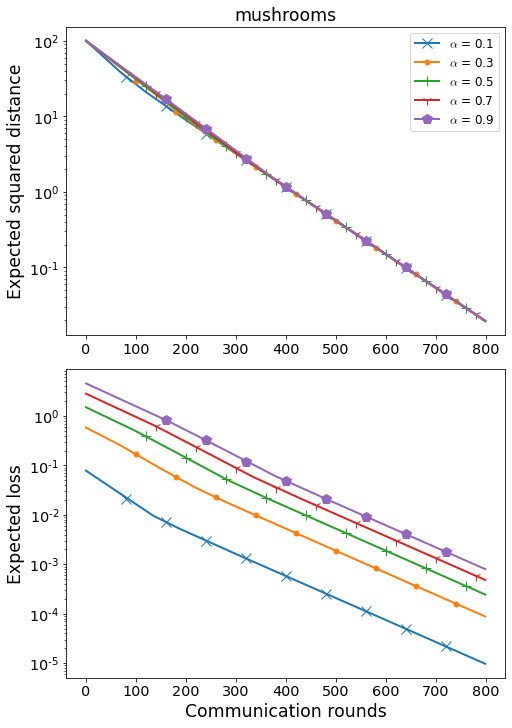

In [7]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 800

alphas_shown = alphas[::2]
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, [alpha], dataset_name, logreg, ks)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {:.1f}'.format(alpha) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Expected squared distance')
axs[1].set_ylabel('Expected loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [8]:
dataset_name = 'ijcnn1.bz2'
alg = LogReg
d = number_of_features(dataset_name)
ks = np.random.randint(d, size=n_workers)
ks += 1

In [10]:
for alpha in alphas:
    alpha = float(alpha)
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it, regularization=regularization)
    model.run_diana_sparsification(ks, max_it)

alpha = 0.1 
 --------------------
Worker(logreg) 0 tolerance 1e-06
Learning rate is 2.9922743962755978
   27/100000 Iterations: fun_value 0.428025 norm of the gradient 8.173647351087375e-076
Worker(logreg) 1 tolerance 1e-06
Learning rate is 3.5304019751154443
   22/100000 Iterations: fun_value 0.445174 norm of the gradient 9.975846302353845e-076
Worker(logreg) 2 tolerance 1e-06
Learning rate is 3.3908563001882595
   23/100000 Iterations: fun_value 0.441445 norm of the gradient 9.901439654098189e-076
Worker(logreg) 3 tolerance 1e-06
Learning rate is 3.23708375437335
   26/100000 Iterations: fun_value 0.435234 norm of the gradient 7.674373638980503e-076
Worker(logreg) 4 tolerance 1e-06
Learning rate is 3.133013517701246
   27/100000 Iterations: fun_value 0.428660 norm of the gradient 8.342521844188982e-076
Worker(logreg) 5 tolerance 1e-06
Learning rate is 2.8291609686396684
   31/100000 Iterations: fun_value 0.416771 norm of the gradient 7.885268198203554e-076
Worker(logreg) 6 tolerance

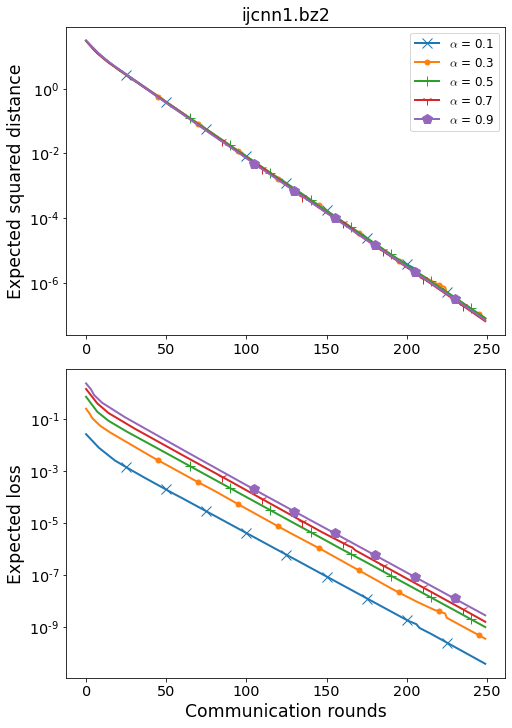

In [13]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 250

alphas_shown = alphas[::2]
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, [alpha], dataset_name, logreg, ks)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {:.1f}'.format(alpha) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Expected squared distance')
axs[1].set_ylabel('Expected loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [6]:
dataset_name = 'w6a'
alg = LogReg
d = number_of_features(dataset_name)
ks = np.random.randint(d, size=n_workers)
ks += 1
max_it = 3000

In [7]:
for alpha in alphas:
    alpha = float(alpha)
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it, regularization=regularization)
    model.run_diana_sparsification(ks, max_it)

alpha = 0.1 
 --------------------
Worker(logreg) 0 tolerance 1e-06
Learning rate is 1.1321920908913758
   83/100000 Iterations: fun_value 0.495942 norm of the gradient 9.168071601289745e-076
Worker(logreg) 1 tolerance 1e-06
Learning rate is 0.991959385908836
   84/100000 Iterations: fun_value 0.219764 norm of the gradient 9.211880991577731e-076
Worker(logreg) 2 tolerance 1e-06
Learning rate is 1.3162787066429849
   59/100000 Iterations: fun_value 0.251863 norm of the gradient 9.941516240053291e-076
Worker(logreg) 3 tolerance 1e-06
Learning rate is 1.2534608640091207
   63/100000 Iterations: fun_value 0.240808 norm of the gradient 9.309929538285791e-076
Worker(logreg) 4 tolerance 1e-06
Learning rate is 0.8964393484262232
   93/100000 Iterations: fun_value 0.216760 norm of the gradient 9.188514092010365e-076
Worker(logreg) 5 tolerance 1e-06
Learning rate is 1.2022888728206524
   67/100000 Iterations: fun_value 0.235344 norm of the gradient 9.791425431048372e-076
Worker(logreg) 6 toleran

/home/gasanoe/FLIX_small_scale_experiments/models.py:333: RuntimeWarning: divide by zero encountered in log
  return -(np.where(y == 1, np.log(h), zeros) + np.where(y == 0, np.log(1-h), zeros)).mean()


 6000/ 6000 Iterations: fun_value 0.270732
 3000/ 3000 Iterations: fun_value 0.270732
alpha = 0.5 
 --------------------
Worker(logreg) 0 tolerance 1e-06
Learning rate is 1.1321920908913758
   83/100000 Iterations: fun_value 0.495942 norm of the gradient 9.168071601289745e-076
Worker(logreg) 1 tolerance 1e-06
Learning rate is 0.991959385908836
   84/100000 Iterations: fun_value 0.219764 norm of the gradient 9.211880991577731e-076
Worker(logreg) 2 tolerance 1e-06
Learning rate is 1.3162787066429849
   59/100000 Iterations: fun_value 0.251863 norm of the gradient 9.941516240053291e-076
Worker(logreg) 3 tolerance 1e-06
Learning rate is 1.2534608640091207
   63/100000 Iterations: fun_value 0.240808 norm of the gradient 9.309929538285791e-076
Worker(logreg) 4 tolerance 1e-06
Learning rate is 0.8964393484262232
   93/100000 Iterations: fun_value 0.216760 norm of the gradient 9.188514092010365e-076
Worker(logreg) 5 tolerance 1e-06
Learning rate is 1.2022888728206524
   67/100000 Iterations: f

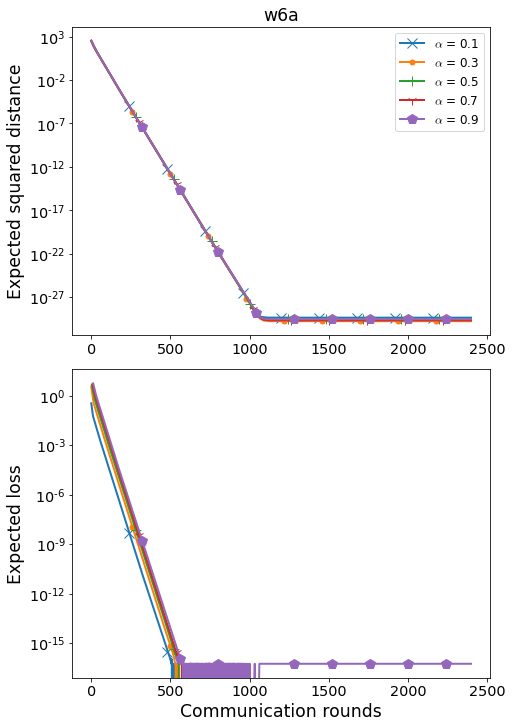

In [9]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 2400

alphas_shown = alphas[::2]
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, [alpha], dataset_name, logreg, ks)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {:.1f}'.format(alpha) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Expected squared distance')
axs[1].set_ylabel('Expected loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [ ]:
dataset_name = 'a6a'
alg = LogReg
d = number_of_features(dataset_name)
ks = np.random.randint(d, size=n_workers)
ks += 1
max_it = 1000

In [ ]:
for alpha in alphas:
    alpha = float(alpha)
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
    model.run_diana_sparsification(ks, max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 1000

alphas_shown = alphas[::2]
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, [alpha], dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {:.1f}'.format(alpha) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Expected squared distance')
axs[1].set_ylabel('Expected loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

## 2. Gradient Descent 

In [ ]:
alphas = np.array([1.0, 1e-1, 1e-2, 1e-3, 1e-4])
dataset_name = 'mushrooms'
n_workers = 8
exp = 'gd'
max_it = 200

alg = LogReg
logreg = True

In [ ]:
for alpha in alphas:
    print('------------------- alpha = {} --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it, regularization=regularization)
    print('Running GD...')
    model.run_gd(max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 200

alphas_shown = alphas
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, [alpha] * n_workers, dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery +  2 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 2 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {}'.format(np.format_float_scientific(alpha, trim='-', exp_digits=1)) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Squared distance')
axs[1].set_ylabel('Loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [ ]:
dataset_name = 'ijcnn1.bz2'
n_workers = 8
exp = 'gd'
max_it = 100

alg = LogReg
logreg = True

In [ ]:
for alpha in alphas:
    print('-------------------- alpha = {} --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
    model.run_gd(max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 25

alphas_shown = alphas
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, [alpha] * n_workers, dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    

    axs[0].plot(dists, marker=markers[ind], markevery=(2, 2), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(2, 2), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {}'.format(np.format_float_scientific(alpha, trim='-', exp_digits=1)) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Squared distance')
axs[1].set_ylabel('Loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [ ]:
dataset_name = 'w6a'
n_workers = 8
exp = 'gd'
max_it = 200

alg = LogReg
logreg = True

In [ ]:
for alpha in alphas:
    print('-------------------- alpha = {} --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
    print('Running GD...')
    model.run_gd(max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 75

alphas_shown = alphas
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, [alpha] * n_workers, dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {}'.format(np.format_float_scientific(alpha, trim='-', exp_digits=1)) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Squared distance')
axs[1].set_ylabel('Loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [ ]:
alphas = np.array([1.0, 1e-1, 1e-2, 1e-3, 1e-4])
dataset_name = 'a6a'
n_workers = 8
exp = 'gd'
max_it = 200

alg = LogReg
logreg = True

In [ ]:
for alpha in alphas:
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
    model.run_gd(max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 175

alphas_shown = alphas
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, [alpha] * n_workers, dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(10 + 3 * ind, 13), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(10 + 3 * ind, 13), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {}'.format(np.format_float_scientific(alpha, trim='-', exp_digits=1)) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Squared distance')
axs[1].set_ylabel('Loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

## 3. Compressed Gradient Descent

In [ ]:
dataset_name = 'mushrooms'
exp= 'cgd'
alg = LogReg
d = number_of_features(dataset_name)
ks = np.random.randint(d, size=n_workers)
ks += 1
max_it = 1000
alphas = np.linspace(0.1, 1.0, 10)[::2]

In [ ]:
for alpha in alphas:
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
    model.run_cgd(ks, max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 1000

alphas_shown = alphas
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, alpha, dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {:.1f}'.format(alpha) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Expected squared distance')
axs[1].set_ylabel('Expected loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [ ]:
dataset_name = 'ijcnn1.bz2'
exp= 'cgd'
alg = LogReg
d = number_of_features(dataset_name)
ks = np.random.randint(d, size=n_workers)
ks += 1
max_it = 1000
alphas = np.linspace(0.1, 1.0, 10)[::2]

In [ ]:
for alpha in alphas:
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
    model.run_cgd(ks, max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 200

alphas_shown = alphas
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, alpha, dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {:.1f}'.format(alpha) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Expected squared distance')
axs[1].set_ylabel('Expected loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [ ]:
dataset_name = 'w6a'
exp= 'cgd'
alg = LogReg
d = number_of_features(dataset_name)
ks = np.random.randint(d, size=n_workers)
ks += 1
max_it = 1000
alphas = np.linspace(0.1, 1.0, 10)[::2]

In [ ]:
for alpha in alphas:
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
    model.run_cgd(ks, max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 200

alphas_shown = alphas
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, alpha, dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {:.1f}'.format(alpha) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Expected squared distance')
axs[1].set_ylabel('Expected loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

In [ ]:
dataset_name = 'a6a'
exp= 'cgd'
alg = LogReg
d = number_of_features(dataset_name)
ks = np.random.randint(d, size=n_workers)
ks += 1
max_it = 1000
alphas = np.linspace(0.1, 1.0, 10)[::2]

In [ ]:
for alpha in alphas:
    print('alpha = {} \n --------------------'.format(alpha))
    model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
    model.run_cgd(ks, max_it)

In [ ]:
fig, axs = plt.subplots(2, figsize=(7, 10), constrained_layout=True)
n_iter_shown = 1000

alphas_shown = alphas
ind = 0

for alpha in alphas_shown:
    run = read_run(exp, alpha, dataset_name, logreg)

    f_values = run['fval'][:n_iter_shown]
    dists = run['dist'][:n_iter_shown]
    
    markevery = int(f_values.size / 10)

    axs[0].plot(dists, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    axs[1].plot(f_values, marker=markers[ind], markevery=(markevery + 20 * ind, markevery), markersize=10)
    ind += 1

axs[0].legend([r'$\alpha$ = {:.1f}'.format(alpha) for alpha in alphas_shown])
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Communication rounds')
axs[0].set_ylabel('Expected squared distance')
axs[1].set_ylabel('Expected loss')
axs[0].set_title(dataset_name)
alg = get_alg(logreg)
name = exp + '_' + alg + '_' + dataset_name
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

## 4. CGD experiments with fixed sparsification parameter

In [ ]:
datasets = ['mushrooms', 'ijcnn1.bz2', 'w6a', 'a6a']

In [ ]:
alphas = np.array([1.0, 1e-1, 1e-2, 1e-3, 1e-4])
n_workers = 8
exp = 'cgd'
max_it = 300

alg = LogReg
logreg = True

In [ ]:
for dataset_name in datasets:
    for alpha in alphas:
        d = number_of_features(dataset_name)
        k_array = np.linspace(0.2, 1.0, 5) * d
        k_array = np.array(k_array, dtype=np.int)
        k_array = np.insert(k_array, 0, 1)
        model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
        for k in k_array:
            ks = np.array([k] * n_workers, dtype=np.int)
            print('alpha = {} k = {} \n --------------------'.format(alpha, k))
            print('Running Compressed Gradient Descent...')
            model.run_cgd(ks, max_it)

In [ ]:
fig, axs = plt.subplots(nrows=len(datasets), ncols=len(alphas), sharey=True, figsize=(5 * len(alphas) , 5 * len(datasets)), constrained_layout=True)

n_iter_shown = 300

alphas_shown = alphas
ind_ext1 = 0
ind_ext2 = 0
ind_int = 0

for dataset_name in datasets:
    ind_ext1 = 0
    for alpha in alphas_shown:
        ind_int = 0
        d = number_of_features(dataset_name)
        k_array = np.linspace(0.2, 1.0, 5) * d
        k_array = np.array(k_array, dtype=np.int)
        k_array = np.insert(k_array, 0, 1)
        
        k_array_shown = k_array
        
        for k in k_array_shown:    
            run = read_run(exp, [alpha] * n_workers, dataset_name, logreg, [k] * n_workers)
            f_values = run['fval'][:n_iter_shown]
            
            f_values = f_values[f_values > 1e-15]

            markevery = int(f_values.size / 10)
            axs[ind_ext2, ind_ext1].plot(f_values, marker=markers[ind_int], markevery=(markevery + 2 * ind_int, markevery), markersize=10)
            ind_int += 1



        axs[ind_ext2, ind_ext1].legend([r'$k$ = {}'.format(k) for k in k_array_shown])
        axs[ind_ext2, ind_ext1].set_yscale('log')
        axs[ind_ext2, ind_ext1].set_xlabel('Communication rounds')
        axs[ind_ext2, ind_ext1].set_ylabel('Loss')
        axs[ind_ext2, ind_ext1].set_title(dataset_name + r', $\alpha$ = {}'.format(alpha) )
        axs[ind_ext2, ind_ext1].yaxis.set_tick_params(labelbottom=True)
        ind_ext1 += 1
    ind_ext2 += 1
    
alg = get_alg(logreg)
name = exp + '_' + alg + '_all'
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

## 5. Comparing CGD with GD in terms of communication cost

In [ ]:
max_comm_cost = 50000
alg = LogReg
for dataset_name in datasets:
    for alpha in alphas:
        d = number_of_features(dataset_name)
        k_array = np.linspace(0.2, 1.0, 5) * d
        k_array = np.array(k_array, dtype=np.int)
        k_array = np.insert(k_array, 0, 1)
        model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, 1500)
        for k in k_array:
            max_it = int(math.ceil(max_comm_cost / (n_workers * k)))
            ks = np.array([k] * n_workers, dtype=np.int)
            print('---------------alpha = {}, k = {}, datasets = {} --------------------'.format(alpha, k, dataset_name))
            print('Running Compressed Gradient Descent...')
            model.run_cgd(ks, max_it)

In [ ]:
alphas_shown = alphas[:-1]
comm_cost_shown = 50000

fig, axs = plt.subplots(nrows=len(datasets), ncols=len(alphas_shown), sharey='row', figsize=(5 * len(alphas) , 5 * len(datasets)), constrained_layout=True)

ind_ext1 = 0
ind_ext2 = 0
ind_int = 0

for dataset_name in datasets:
    ind_ext1 = 0
    for alpha in alphas_shown:
        ind_int = 0
        d = number_of_features(dataset_name)
        k_array = np.linspace(0.2, 1.0, 5) * d
        k_array = np.array(k_array, dtype=np.int)
        k_array = np.insert(k_array, 0, 1)
        
        k_array_shown = k_array
        
        for k in k_array_shown:    
            run = read_run(exp, [alpha] * n_workers, dataset_name, logreg, [k] * n_workers)
            f_values = run['fval']
            f_values = f_values[f_values > 1e-9]
            comm_cost = np.array([i * k * n_workers for i in range(len(f_values))])
            
            
            f_values = f_values[comm_cost < comm_cost_shown]
            comm_cost = comm_cost[comm_cost < comm_cost_shown]
            
            markevery = int(math.sqrt(len(f_values)))

            axs[ind_ext2, ind_ext1].plot(comm_cost / 1000, f_values, marker=markers[ind_int], markevery=(2, markevery), markersize=10)
            ind_int += 1



        axs[ind_ext2, ind_ext1].legend([r'$k$ = {}'.format(k) for k in k_array_shown])
        axs[ind_ext2, ind_ext1].set_yscale('log')
        axs[ind_ext2, ind_ext1].set_xlabel('Communication cost')
        axs[ind_ext2, ind_ext1].set_ylabel('Loss')
        # axs[ind_ext2, ind_ext1].set_ylim(bottom=1e-8)
        axs[ind_ext2, ind_ext1].set_title(dataset_name + r', $\alpha$ = {}'.format(alpha) )
        axs[ind_ext2, ind_ext1].yaxis.set_tick_params(labelbottom=True)
        ind_ext1 += 1
    ind_ext2 += 1
    
alg = get_alg(logreg)
name = exp + '_' + alg + '_all_comm_cost'
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

## 6. Comparing DIANA to GD in terms of communication rounds

In [ ]:
datasets = ['mushrooms', 'ijcnn1.bz2', 'w6a', 'a6a']

In [ ]:
alphas = np.array([1.0, 1e-1, 1e-2, 1e-3, 1e-4])
n_workers = 50
exp = 'diana'
max_it = 2000

alg = LogReg
logreg = True

In [ ]:
for dataset_name in datasets:
    print('------------- {} -------------'.format(dataset_name))
    for alpha in alphas:
        d = number_of_features(dataset_name)
        k_array = np.linspace(0.2, 1.0, 5) * d
        k_array = np.array(k_array, dtype=np.int)
        k_array = np.insert(k_array, 0, 1)
        print('----------- alpha = {} ------------'.format(alpha))
        model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
        for k in k_array:
            ks = np.array([k] * n_workers, dtype=np.int)
            print('----------------- k = {} --------------------'.format(k))
            print('Running DIANA...')
            model.run_diana_sparsification(ks, max_it)
        print('Running Gradient Descent...')
        model.run_gd(max_it)

In [ ]:
alphas_shown = alphas[:-1]

fig, axs = plt.subplots(nrows=len(datasets), ncols=len(alphas_shown), sharey=True, figsize=(5 * len(alphas_shown) , 5 * len(datasets)), constrained_layout=True)

n_iter_shown = 2000

ind_ext1 = 0
ind_ext2 = 0
ind_int = 0

for dataset_name in datasets:
    ind_ext1 = 0
    for alpha in alphas_shown:
        ind_int = 0
        d = number_of_features(dataset_name)
        k_array = np.linspace(0.2, 1.0, 5) * d
        k_array = np.array(k_array, dtype=np.int)
        k_array = np.insert(k_array, 0, 1)
        
        k_array_shown = k_array
        
        for k in k_array_shown:    
            run = read_run('diana', [alpha] * n_workers, dataset_name, logreg, [k] * n_workers)
            f_values = run['fval'][:n_iter_shown]
            
            f_values = f_values[f_values > 1e-15]

            markevery = int(f_values.size / 10)
            axs[ind_ext2, ind_ext1].plot(f_values, marker=markers[ind_int], markevery=(markevery + 2 * ind_int, markevery), markersize=10, 
                                        label = r'$k$ = {}'.format(k))
            ind_int += 1
            
        run = read_run('gd', [alpha] * n_workers, dataset_name, logreg)
        f_values = run['fval'][:n_iter_shown]
        f_values = f_values[f_values > 1e-15]
        markevery = int(f_values.size / 10)
        axs[ind_ext2, ind_ext1].plot(f_values, marker=markers[ind_int], markevery=(markevery + 2 * ind_int, markevery), markersize=10, label='GD')


        axs[ind_ext2, ind_ext1].set_yscale('log')
        axs[ind_ext2, ind_ext1].set_xlabel('Communication rounds')
        axs[ind_ext2, ind_ext1].set_ylabel('Loss')
        axs[ind_ext2, ind_ext1].set_title(dataset_name + r', $\alpha$ = {}'.format(alpha) )
        axs[ind_ext2, ind_ext1].yaxis.set_tick_params(labelbottom=True)
        axs[ind_ext2, ind_ext1].legend()
        ind_ext1 += 1
    ind_ext2 += 1
    
alg = get_alg(logreg)
name = 'diana' + '_' + alg + '_all(n=50)'
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

## 7. Comparing DIANA to GD in terms of communication cost

In [ ]:
datasets = ['mushrooms', 'ijcnn1.bz2', 'w6a', 'a6a']

In [ ]:
alphas = np.array([1.0, 1e-1, 1e-2, 1e-3, 1e-4])
n_workers = 50
exp = 'diana'
max_comm_cost = 50000

alg = LogReg
logreg = True

In [ ]:
for dataset_name in datasets:
    print('------------------------------- {} -------------------------------'.format(dataset_name))
    for alpha in alphas:
        d = number_of_features(dataset_name)
        k_array = np.linspace(0.2, 1.0, 5) * d
        k_array = np.array(k_array, dtype=np.int)
        k_array = np.insert(k_array, 0, 1)
        print('---------------------------- alpha = {} ----------------------------'.format(alpha))
        model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, 1500)
        for k in k_array:
            ks = np.array([k] * n_workers, dtype=np.int)
            print('------------------------- k = {} -------------------------'.format(k))
            print('Running DIANA...')
            max_it = int(math.ceil(max_comm_cost / (n_workers * k)))
            model.run_diana_sparsification(ks, max_it)
        print('Running Gradient Descent...')
        max_it = int(math.ceil(max_comm_cost / (n_workers * d)))
        model.run_gd(max_it)

In [ ]:
alphas_shown = alphas[:-1]

fig, axs = plt.subplots(nrows=len(datasets), ncols=len(alphas_shown), sharey=True, figsize=(5 * len(alphas_shown) , 5 * len(datasets)), constrained_layout=True)

# n_iter_shown = 2000

ind_ext1 = 0
ind_ext2 = 0
ind_int = 0

for dataset_name in datasets:
    ind_ext1 = 0
    for alpha in alphas_shown:
        ind_int = 0
        d = number_of_features(dataset_name)
        k_array = np.linspace(0.2, 1.0, 5) * d
        k_array = np.array(k_array, dtype=np.int)
        k_array = np.insert(k_array, 0, 1)
        
        k_array_shown = k_array
        
        for k in k_array_shown:    
            run = read_run('diana', [alpha] * n_workers, dataset_name, logreg, [k] * n_workers)
            f_values = run['fval']
            comm_cost = np.array([i * k * n_workers for i in range(len(f_values))])
            
            comm_cost = comm_cost[f_values > 1e-15]
            f_values = f_values[f_values > 1e-15]

            markevery = max(int(f_values.size / 10), 2)
            axs[ind_ext2, ind_ext1].plot(comm_cost / 1000, f_values, marker=markers[ind_int], markevery=(markevery + 2 * ind_int, markevery), markersize=10, 
                                        label = r'$k$ = {}'.format(k))
            ind_int += 1
    
            
        run = read_run('gd', [alpha] * n_workers, dataset_name, logreg)
        f_values = run['fval']
        comm_cost = np.array([i * d * n_workers for i in range(len(f_values))])

            
        comm_cost = comm_cost[f_values > 1e-15]
        f_values = f_values[f_values > 1e-15]
        
        markevery = max(int(f_values.size / 10), 2)
        axs[ind_ext2, ind_ext1].plot(comm_cost / 1000, f_values, marker=markers[ind_int], markevery=(markevery + 2 * ind_int, markevery), markersize=10, label='GD')


        axs[ind_ext2, ind_ext1].set_yscale('log')
        axs[ind_ext2, ind_ext1].set_xlabel('Communication cost')
        axs[ind_ext2, ind_ext1].set_ylabel('Loss')
        axs[ind_ext2, ind_ext1].set_title(dataset_name + r', $\alpha$ = {}'.format(alpha) )
        axs[ind_ext2, ind_ext1].yaxis.set_tick_params(labelbottom=True)
        axs[ind_ext2, ind_ext1].legend()
        ind_ext1 += 1
    ind_ext2 += 1
    
alg = get_alg(logreg)
name = 'diana' + '_' + alg + '_all_comm_cost(n=50)'
create_plot_dir()
plt.savefig(PLOT_PATH + '/' + name + '.pdf')
plt.show()

## 8. Sine Meta Learning experiments 

### Creating artificial dataset

In [ ]:
number_of_tasks = 20
number_of_points_per_task = 50
dataset_name = 'artificial_sine'

In [ ]:
X_sine = np.empty(shape=(number_of_tasks * number_of_points_per_task, 1))
y_sine = np.empty(shape=(number_of_tasks * number_of_points_per_task))

In [ ]:
rng = default_rng()
a_array = []
b_array = []
for i in range(number_of_tasks):
    a = 0.1 + rng.random() * (5.0 - 0.1)
    a_array.append(a)
    b = rng.random() * 2 * np.pi
    b_array.append(b)
    print('a = {}, b = {}'.format(a, b))
    x_train = -5.0 + rng.random((number_of_points_per_task, 1)) * 10.0
    y_train = a * np.sin(x_train + b)
    X_sine[number_of_points_per_task * i : number_of_points_per_task * (i + 1)] = x_train.copy()
    y_sine[number_of_points_per_task * i : number_of_points_per_task * (i + 1)] = y_train.squeeze(1).copy()
a_array = np.array(a_array)
b_array = np.array(b_array)

In [ ]:
a_array

In [ ]:
b_array

In [ ]:
for i in range(min(5, number_of_tasks)):
    inds = range(number_of_points_per_task * i, number_of_points_per_task * (i + 1))
    plt.scatter(X_sine[inds], y_sine[inds])

In [ ]:
dump_svmlight_file(X_sine, y_sine, DATASET_PATH + dataset_name)

In [ ]:
np.save(DATASET_PATH + 'a.npy', a_array)
np.save(DATASET_PATH + 'b.npy', b_array)

### Running Gradient Descent 

In [ ]:
alpha = 0.5
n_workers = number_of_tasks
exp = 'gd'
max_it = 100

alg = NN_1d_regression
logreg = False

In [ ]:
print('------------------- alpha = {} --------------------'.format(alpha))
model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
print('Running GD...')
model.run_gd(max_it)

We rerun GD for some workers in order to achieve required precision.

In [ ]:
worker_id = 6
worker_to_be_fit = model.workers[worker_id]

In [ ]:
print(worker_to_be_fit.fun_value(worker_to_be_fit.w_opt))

In [ ]:
L = 0.1
max_L = 0.1
max_it = 100000
tol = 1e-2
w = np.random.randn(worker_to_be_fit.iterate_size())
max_L_constant = 0.1 * 2 ** 40
grad_norm = None
min_f_value = float('Inf')

for it in range(max_it):
    grad = worker_to_be_fit.grad(worker_to_be_fit.x_train, worker_to_be_fit.y_train, w)
    L = 0.1
    curr_fun_value = worker_to_be_fit.fun_value(w)
    
    while True:
        if L > max_L_constant: # if L becomes too large, jump to another random point w
            w = np.random.randn(worker_to_be_fit.iterate_size())
            grad = worker_to_be_fit.grad(worker_to_be_fit.x_train, worker_to_be_fit.y_train, w)
            L = 0.1
            curr_fun_value = worker_to_be_fit.fun_value(w)

        print('Current L = {:f}'.format(L), end='\r')
            
        f_value_ = worker_to_be_fit.fun_value(w - grad / L)
        if curr_fun_value - f_value_ > 0:
            break
        L *= 2.0
        
    w -= grad / L
    grad_norm = la.norm(grad)
    
    if f_value_ < min_f_value:
        min_f_value = f_value_
        worker_to_be_fit.memory = w
    
    if max_L < L:
        max_L = L
    print('                               {:5d}/{:5d} Iterations: fun_value {:f} grad_norm {:f}'.format(it+1, max_it, f_value_, grad_norm), end='\r')                
    if grad_norm < tol and f_value_ < tol ** 2:
          break
print('')


In [ ]:
worker_to_be_fit.w_opt = copy.deepcopy(worker_to_be_fit.memory)

Let us check loss values for pure local models estimates

In [ ]:
for worker_id in range(model.n_workers):
    print(model.workers[worker_id].fun_value(model.workers[worker_id].w_opt))

All values are below $10^{-4}$.

In [ ]:
model.alpha

In [ ]:
for worker_id in range(model.n_workers):
    print(model.workers[worker_id].alpha)

In [ ]:
min_L = 1e-6
max_L = 0.1
max_it = 50000
tol = 1e-2
max_L_constant = 2 ** 40
grad_norm = None
min_f_value = float('Inf')
memory = None

try:
    for it in range(max_it):
        grad = model.grad(w)
        L = min_L
        curr_fun_value = model.fun_value(w)

        while True:
            if L > max_L_constant: # if L becomes too large, jump to another random point w
                w = np.random.randn(self.iterate_size())
                grad = model.grad(w)
                L = min_L
                curr_fun_value = model.fun_value(w)

            print('Current L = {:f}'.format(L), end='\r')

            f_value_ = model.fun_value(w - grad / L)
            if curr_fun_value - f_value_ > 0:
                break
            L *= 2.0

        w -= grad / L
        grad_norm = la.norm(grad)

        if f_value_ < min_f_value:
            min_f_value = f_value_
            memory = w

        if max_L < L:
            max_L = L
        print('                               {:5d}/{:5d} Iterations: fun_value {:f} grad_norm {:f}'.format(it+1, max_it, f_value_, grad_norm), end='\r')                
        if grad_norm < tol and f_value_ < tol ** 2:
              break
except KeyboardInterrupt:
    print('')
    print(min_f_value)
else:
    print('')
    print('Unknown problem')

In [ ]:
model.w_opt_global = copy.deepcopy(memory)

In [ ]:
model.w_opt_global

### Global model performance on a worker

In [ ]:
n_test = 1000
mse_local_arr = []
mse_global_arr = []
for worker_id in range(model.n_workers):
    x_test_int = -5.0 + rng.random((n_test, 1)) * 10.0
    y_test_int = a_array[worker_id] * np.sin(x_test_int + b_array[worker_id])
    model.workers[worker_id].set_weights(model.workers[worker_id].w_opt)
    y_test_local = model.workers[worker_id].model(torch.from_numpy(x_test_int).float()).detach().numpy()
    model.workers[worker_id].set_weights(model.workers[worker_id].compute_local(model.w_opt_global))
    y_test_global = model.workers[worker_id].model(torch.from_numpy(x_test_int).float()).detach().numpy()
    mse_local = np.mean((y_test_int - y_test_local) ** 2)
    mse_global = np.mean((y_test_int - y_test_global) ** 2)
    mse_local_arr.append(mse_local)
    mse_global_arr.append(mse_global)
    print('Worker {}: mse for local model = {}, mse for generalized model = {}'.format(worker_id, mse_local, mse_global))

In [ ]:
plt.plot(mse_local_arr, label='local')
plt.plot(mse_global_arr, label='global')
plt.xlabel('Worker id')
plt.ylabel('MSE loss')
plt.legend()
# plt.savefig('tmp.pdf')
plt.show()

In [ ]:
plt.scatter(mse_local_arr, mse_global_arr)
lim_ = max(max(mse_global_arr), max(mse_local_arr))
line = np.linspace(0, 0.5, 20)
plt.xlabel('MSE for local models')
plt.ylabel('MSE for generalizes models')
plt.xlim([0, lim_])
plt.ylim([0, lim_])
plt.plot(line, line)
plt.tight_layout()
plt.savefig('tmp2.pdf')
plt.show()

### Varying alphas

In [ ]:
# model_initial = copy.deepcopy(model)

In [ ]:
model_init_dict = {'model' : model_initial}

In [ ]:
with open('model_initial', 'wb') as file:
    pickle.dump(model_init_dict, file)

In [ ]:
import pickle

In [ ]:
with open('model_initial', 'rb') as file:
    model_initial = pickle.load(file)['model']

In [ ]:
models = []
for i in range(10):
    models.append(copy.deepcopy(model_initial))

In [ ]:
alphas = np.arange(0, 1.0, 0.1)

In [ ]:
alphas

In [ ]:
for i in range(1, 10):
    print(i)
    if i != 5:
        models[i].change_alpha(alphas[i])

In [ ]:
for i in range(10):
    print(models[i].workers[0].alpha)

In [ ]:
models[0].w_opt_global = np.zeros(models[0].d)

In [ ]:
models[0].w_opt_global.shape

In [ ]:
for i in range(1, 10):
    model = models[i]
    min_L = 1e-6
    max_L = 0.1
    max_it = 100000
    tol = 1e-2
    max_L_constant = 2 ** 40
    w = copy.deepcopy(models[i-1].w_opt_global)
    grad_norm = None
    min_f_value = float('Inf')

    try:
        for it in range(max_it):
            grad = model.grad(w)
            L = min_L
            curr_fun_value = model.fun_value(w)

            while True:
                if L > max_L_constant: # if L becomes too large, jump to another random point w
                    w = np.random.randn(model.d)
                    grad = model.grad(w)
                    L = min_L
                    curr_fun_value = model.fun_value(w)

                print('Current L = {:f}'.format(L), end='\r')

                f_value_ = model.fun_value(w - grad / L)
                if curr_fun_value - f_value_ > 0:
                    break
                L *= 2.0

            w -= grad / L
            grad_norm = la.norm(grad)

            if f_value_ < min_f_value:
                min_f_value = f_value_
                model.w_opt_global = copy.deepcopy(w)

            if max_L < L:
                max_L = L
            print('                               {:5d}/{:5d} Iterations: fun_value {:f} grad_norm {:f}'.format(it+1, max_it, f_value_, grad_norm), end='\r')                
            if grad_norm < tol and f_value_ < tol:
                  break
    except KeyboardInterrupt:
        print('')
        print(min_f_value)
    else:
        print('')
        print('Unknown problem')

In [ ]:
models[0].change_alpha(0.0)

In [ ]:
models[0].w_opt_global = np.zeros(models[0].d)

In [ ]:
for ind in range(10):
    print(models[ind].fun_value(models[ind].w_opt_global))

In [ ]:
model_dict = {'models' : models}

In [ ]:
with open('models', 'wb') as file:
    pickle.dump(model_dict, file)

In [ ]:
with open('models', 'rb') as file:
    models = pickle.load(file)['models']

In [ ]:
with open('model_initial', 'rb') as file:
    model_1 = pickle.load(file)['model']

In [ ]:
model_1.change_alpha(1.0)

In [ ]:
model = model_1
max_L = 0.1
min_L = 1e-10
max_it = 100000
tol = 1e-2
max_L_constant = 2 ** 40
w = copy.deepcopy(models[-1].w_opt_global)
grad_norm = None
min_f_value = float('Inf')

try:
    for it in range(max_it):
        grad = model.grad(w)
        L = min_L
        curr_fun_value = model.fun_value(w)

        while True:
            if L > max_L_constant: # if L becomes too large, jump to another random point w
                w = np.random.randn(model.d)
                grad = model.grad(w)
                L = min_L
                curr_fun_value = model.fun_value(w)

            print('Current L = {:f}'.format(L), end='\r')

            f_value_ = model.fun_value(w - grad / L)
            if curr_fun_value - f_value_ > 0:
                break
            L *= 2.0

        w -= grad / L
        grad_norm = la.norm(grad)

        if f_value_ < min_f_value:
            min_f_value = f_value_
            model.w_opt_global = copy.deepcopy(w)

        if max_L < L:
            max_L = L
        print('                               {:5d}/{:5d} Iterations: fun_value {:f} grad_norm {:f}'.format(it+1, max_it, f_value_, grad_norm), end='\r')                
        if grad_norm < tol and f_value_ < tol:
              break
except KeyboardInterrupt:
    print('')
    print(min_f_value)
else:
    print('')
    print('Unknown problem')

### Difference in MSE over alphas

In [ ]:
mse_table = np.empty(shape=(10, models[0].n_workers))

In [ ]:
mse_table.shape

In [ ]:
for i in range(10):
    print(models[i].workers[0].alpha)

In [ ]:
a_array = np.load(DATASET_PATH + 'a.npy')

In [ ]:
b_array = np.load(DATASET_PATH + 'b.npy')

In [ ]:
n_test = 2000
rng = default_rng()
for i in range(models[0].n_workers):
    x_test = -5.0 + rng.random((n_test, 1)) * 10
    y_test = a_array[i] * np.sin(x_test + b_array[i])
    for j in range(10):
        worker = models[j].workers[i]
        worker.set_weights(worker.compute_local(models[j].w_opt_global))
        y_pred = worker.model(torch.from_numpy(x_test).float()).detach().numpy()
        mse = np.mean((y_pred - y_test) ** 2).item()
        mse_table[j][i] = copy.copy(mse)

In [ ]:
mse_alpha = np.mean(mse_table, axis=1)

In [ ]:
mse_alpha.shape

In [ ]:
PLOT_PATH

In [ ]:
plt.plot(np.arange(0.0, 1.0, 0.1), mse_alpha)
plt.xlabel('alpha')
plt.ylabel('MSE loss')
plt.xlim([0, 0.9])
plt.ylim([0, max(mse_alpha)])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.tight_layout()
plt.savefig(PLOT_PATH + '/sine_varied_alphas.pdf')
plt.show()

### Narrowing task space

### New dataset 

In [ ]:
number_of_tasks = 200
number_of_points_per_task = 50
dataset_name = 'artificial_sine_extended'

In [ ]:
X_sine = np.empty(shape=(number_of_tasks * number_of_points_per_task, 1))
y_sine = np.empty(shape=(number_of_tasks * number_of_points_per_task))

In [ ]:
rng = default_rng()
a_array = []
b_array = []
for i in range(number_of_tasks):
    a = 0.1 + rng.random() * (2.0 - 0.1)
    a_array.append(a)
    b = rng.random() * 2 * np.pi
    b_array.append(b)
    x_train = -5.0 + rng.random((number_of_points_per_task, 1)) * 10.0
    y_train = a * np.sin(x_train + b)
    X_sine[number_of_points_per_task * i : number_of_points_per_task * (i + 1)] = x_train.copy()
    y_sine[number_of_points_per_task * i : number_of_points_per_task * (i + 1)] = y_train.squeeze(1).copy()
a_array = np.array(a_array)
b_array = np.array(b_array)

In [ ]:
for i in range(min(5, number_of_tasks)):
    inds = range(number_of_points_per_task * i, number_of_points_per_task * (i + 1))
    plt.scatter(X_sine[inds], y_sine[inds])

In [ ]:
dump_svmlight_file(X_sine, y_sine, DATASET_PATH + dataset_name)

In [ ]:
np.save(DATASET_PATH + 'a_ext.npy', a_array)
np.save(DATASET_PATH + 'b_ext.npy', b_array)

In [ ]:
a_array = np.load(DATASET_PATH + 'a_ext.npy')

In [ ]:
b_array = np.load(DATASET_PATH + 'b_ext.npy')

### Training each local model

In [ ]:
alpha = 0.1
n_workers = number_of_tasks
exp = 'gd'
max_it = 100

alg = NN_1d_regression
logreg = False

In [ ]:
print('------------------- alpha = {} --------------------'.format(alpha))
model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it)
print('Running GD...')
model.run_gd(max_it)

In [ ]:
model_in_dict = {'model' : model}

In [ ]:
import pickle

In [ ]:
with open('model_initial_extended', 'wb') as file:
    pickle.dump(model_in_dict, file)

### Training a global model

In [ ]:
models = []
for i in range(10):
    models.append(copy.deepcopy(model))

In [ ]:
alphas = np.arange(0, 1.0, 0.1)

In [ ]:
for i in range(1,10):
    models[i].change_alpha(alphas[i])

In [ ]:
models[0].w_opt_global = np.zeros(models[0].d)
models[0].alpha = 0.0

In [ ]:
for i in range(2, 10):
    model = models[i]
    min_L = 1e-6
    max_L = 0.1
    max_it = 100000
    tol = 1e-2
    max_L_constant = 2 ** 40
    w = copy.deepcopy(models[i-1].w_opt_global)
    grad_norm = None
    min_f_value = float('Inf')

    try:
        for it in range(max_it):
            grad = model.grad(w)
            L = min_L
            curr_fun_value = model.fun_value(w)

            while True:
                if L > max_L_constant: # if L becomes too large, jump to another random point w
                    w = np.random.randn(model.d)
                    grad = model.grad(w)
                    L = min_L
                    curr_fun_value = model.fun_value(w)

                print('Current L = {:f}'.format(L), end='\r')

                f_value_ = model.fun_value(w - grad / L)
                if curr_fun_value - f_value_ > 0:
                    break
                L *= 2.0

            w -= grad / L
            grad_norm = la.norm(grad)

            if f_value_ < min_f_value:
                min_f_value = f_value_
                model.w_opt_global = copy.deepcopy(w)

            if max_L < L:
                max_L = L
            print('                               {:5d}/{:5d} Iterations: fun_value {:f} grad_norm {:f}'.format(it+1, max_it, f_value_, grad_norm), end='\r')                
            if grad_norm < tol and f_value_ < tol:
                  break
    except KeyboardInterrupt:
        print('')
        print(min_f_value)
    else:
        print('')
        print('Unknown problem')

In [ ]:
model_dict = {'models' : models}

In [ ]:
with open('models_extended_2', 'wb') as file:
    pickle.dump(model_dict, file)

In [ ]:
import pickle

In [ ]:
with open('models_extended', 'rb') as file:
    models = pickle.load(file)['models']

In [ ]:
with open('models_extended_2', 'rb') as file:
    models = pickle.load(file)['models']

### Control node

In [ ]:
n_train = 50
n_test = 1000

In [ ]:
rng = default_rng()
a_cn = 0.1 + rng.random() * (2.0 - 0.1)
b_cn = rng.random() * 2 * np.pi
x_train_cn = -5.0 + rng.random((n_train, 1)) * 10.0
y_train_cn = a_cn * np.sin(x_train_cn + b_cn)

In [ ]:
a_cn

In [ ]:
b_cn

In [ ]:
plt.scatter(x_train_cn, y_train_cn)

In [ ]:
control_node = NN_1d_regression(id_node=1000, alpha=0.5, x_train=x_train_cn, y_train=y_train_cn, regularization=None)

In [ ]:
control_node.set_weights(control_node.w_opt)

In [ ]:
y_pred_train = control_node.model(torch.from_numpy(x_train_cn).float()).detach().numpy()

In [ ]:
plt.scatter(x_train_cn, y_pred_train)

In [ ]:
x_test_cn = -5.0 + rng.random((n_test, 1)) * 10.0
y_test_cn = a_cn * np.sin(x_test_cn + b_cn)

In [ ]:
plt.scatter(x_test_cn, y_test_cn)

In [ ]:
y_prediction_cn = control_node.model(torch.from_numpy(x_test_cn).float()).detach().numpy()

In [ ]:
plt.scatter(x_test_cn, y_prediction_cn)

In [ ]:
mse_array = np.empty(3)

In [ ]:
for i in range(3):
    control_node.alpha = 0.1 * i
    control_node.set_weights(control_node.compute_local(models[i].w_opt_global))
    y_prediction_cn = control_node.model(torch.from_numpy(x_test_cn).float()).detach().numpy()
    mse_array[i] = np.mean((y_prediction_cn - y_test_cn) ** 2)

In [ ]:
mse_array

In [ ]:
y_prediction_cn = control_node.model(torch.from_numpy(x_test_cn).float()).detach().numpy()

In [ ]:
plt.scatter(x_test_cn, y_prediction_cn)

# FOMAML

In [ ]:
number_of_tasks = 200
number_of_points_per_task = 50
dataset_name = 'artificial_sine_extended'

alpha = 0.1
n_workers = number_of_tasks
exp = 'fomaml'
max_it = 1

alg = NN_1d_regression
logreg = False

In [ ]:
model = MasterNode(n_workers, alpha, alg, dataset_name, logreg, True, max_it, compute_smoothness_min=False, tolerance=0.1)

In [ ]:
model.fomaml()